# Comprehensive Theoretical Notes: Support Vector Machines (SVM)

## 1. Geometric Intuition & Core Philosophy
The Support Vector Machine (SVM) is distinct from other classifiers because it is not satisfied with just *any* decision boundary that separates the data. Its objective is to find the **Optimal Hyperplane** that provides the maximum safety buffer between classes.

### The Hyperplane
In geometry, a hyperplane is a subspace of one dimension less than its ambient space.
* **1D Space:** The separator is a **Point**.
* **2D Space:** The separator is a **Line**.
* **3D Space:** The separator is a **Flat Sheet (Plane)**.
* **$n$ Dimensions:** We call it a **Hyperplane**.

> The hyperplane divides the space into two half-spaces. Anything on "Side A" is classified as one class; anything on "Side B" is the other.

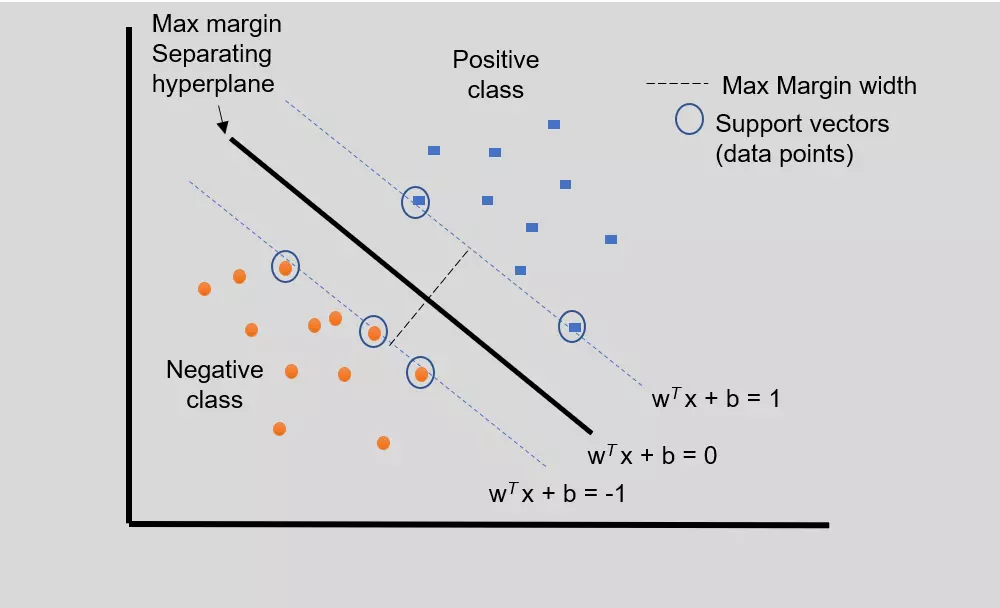

### The Margin (The "Road")
The **Margin** is the physical distance between the decision boundary and the nearest data points of either class.

**Total Margin** or maximum margin is the physical distance between the the two nearest data points of either class. In many textbooks, the "margin" refers to the total width of the separating band—the distance between the two parallel planes that touch the support vectors of each class.

* **Intuition:** A narrow margin is like walking on a tightrope; a small gust of wind (noise in data) can push you off. A wide margin is like walking on a wide bridge; small deviations are safe.

* **Goal:** SVM maximizes this width. This is why SVM is often called a **Large Margin Classifier** or **Maximum Margin Classifier**.

### Support Vectors
These are the most important data points in the training set. They are the points lying closest to the decision boundary.
* **Why "Support"?** They essentially "hold up" or define the position of the margin.
* **Sparsity:** In SVM, the vast majority of data points (those far away from the line) are mathematically irrelevant. Only the Support Vectors determine the model's parameters.

### 🌟🌟🌟 Note: 
SVM will optimize the weights in such a way that the only support vectors determine the weights and the decision boundary

---



## 2. Mathematical Formulation

### The Equation of the Hyperplane
Any hyperplane can be defined by a linear equation involving a vector and a bias:
$$\vec{w} \cdot \vec{x} + b = 0$$

* $\vec{x}$: The input feature vector (e.g., coordinates of a data point).
* $\vec{w}$: The **Weight Vector**. It is perpendicular (normal) to the hyperplane. It defines the "direction" or orientation of the boundary.
* $b$: The **Bias**. It shifts the hyperplane away from the origin, allowing it to fit data that doesn't pass through $(0,0)$.

### The Classification Logic
To classify a new point $\vec{x}_{new}$, we calculate $f(\vec{x}) = \vec{w} \cdot \vec{x}_{new} + b$.
* If $f(\vec{x}) > 0$, the point is on the "Positive" side (Class +1).
* If $f(\vec{x}) < 0$, the point is on the "Negative" side (Class -1).

### The Constraints (Hard Margin)
To create the "road" (margin) of a specific width, we enforce a strict rule for the training data. We demand that for every sample, the result isn't just "positive" or "negative," but that it is **at least 1 unit away** from the boundary.

$$y_i (\vec{w} \cdot \vec{x}_i + b) \ge 1$$

* Here, $y_i$ is the actual class label (+1 or -1).
* This equation ensures that if $y_i$ is positive, the result must be $\ge 1$. If $y_i$ is negative, the result inside the parenthesis must be $\le -1$ (so that negative $\times$ negative $\ge 1$).

### Maximizing the Margin
Geometry tells us that the perpendicular distance between the two boundary lines (the width of the road) is:
$$\text{Width} = \frac{2}{||\vec{w}||}$$

To maximize this **Width**, we must minimize the denominator, $||\vec{w}||$.
Therefore, the SVM optimization problem is formally stated as:

$$\min \frac{1}{2} ||\vec{w}||^2$$
*Subject to the constraint that all points are classified correctly.*

*(Note: We minimize $||\vec{w}||^2$ instead of $||\vec{w}||$ just because the squared version is easier to differentiate in calculus).*

---



## 3. Preprocessing: Feature Scaling
Before applying SVM, **Feature Scaling (Standardization)** is mandatory.

* **Reason:** SVM relies on calculating **Euclidean Distances**.
* **The Problem:** If Feature A is "Income" (range 0–100,000) and Feature B is "Age" (range 0–100), the distance calculation will be completely dominated by Income. The SVM will effectively ignore Age.
* **The Solution:** Scale all data (usually to Mean=0, Variance=1) so every feature contributes equally to the distance calculation.

---

## 4. The Kernel Trick (Non-Linearity)

Real-world data is rarely separable by a straight line. Often, Class A is inside a ring of Class B.

### The Concept: Mapping to Higher Dimensions
If data is not separable in 2D ($x, y$), we can project it into 3D ($x, y, z$) or higher.
* **Analogy:** Imagine red and blue dots mixed on a table. You cannot separate them with a stick (line). If you lift the red dots up (adding a Z-axis dimension), you can slide a flat sheet of paper between the red and blue dots.

### The "Trick" explained
Calculating the coordinates for every point in a higher dimension is computationally expensive (the "Curse of Dimensionality").
However, the SVM math only requires the **Dot Product** between points $(\vec{x}_i \cdot \vec{x}_j)$.

The **Kernel Function** $K(\vec{x}_i, \vec{x}_j)$ allows us to compute the *result* of that high-dimensional dot product without actually performing the transformation.

$$K(\vec{x}, \vec{z}) = \phi(\vec{x}) \cdot \phi(\vec{z})$$

Where $\phi$ represents the transformation to higher dimensions. We calculate the left side (easy math) to get the result of the right side (hard math).

### Mathematical Proof (The "Magic" Example)
Let $x = 3$ and $z = 4$. We want to map them to 3D space.

**Method 1: The Hard Way (Explicit Transformation)**
Mapping function $\phi(a) = (a^2, \sqrt{2}a, 1)$.
1.  Transform $x$: $(9, 3\sqrt{2}, 1)$
2.  Transform $z$: $(16, 4\sqrt{2}, 1)$
3.  Calculate Dot Product:
    $$(9 \times 16) + (3\sqrt{2} \times 4\sqrt{2}) + (1 \times 1)$$
    $$144 + 24 + 1 = \mathbf{169}$$

**Method 2: The Kernel Trick (Shortcut Formula)**
Kernel Formula $K(x, z) = (x \cdot z + 1)^2$.
1.  Plug in numbers:
    $$(3 \times 4 + 1)^2$$
2.  Solve:
    $$(13)^2 = \mathbf{169}$$

*Conclusion:* We get the exact same result (169) instantly, saving massive computational resources.

### Types of Kernels
1.  **Linear Kernel:** $K(x, z) = x \cdot z$. Used when data is already linearly separable (e.g., text classification).
2.  **Polynomial Kernel:** $K(x, z) = (x \cdot z + c)^d$. Creates curved boundaries.
3.  **Radial Basis Function (RBF):** $K(x, z) = \exp(-\gamma ||x - z||^2)$.
    * This calculates similarity based on distance.
    * It projects data into **infinite** dimensions.
    * It creates localized "bubbles" or islands around data clusters.

---



## 5. Regularization (Handling Noise)

In the real world, data has noise (errors). A "Hard Margin" that strictly forbids errors might result in a tiny margin to accommodate one outlier.

### Soft Margin SVM
We introduce a "Slack Variable" ($\xi$) which allows some points to violate the margin constraint (fall inside the road or on the wrong side).

The objective function changes to:
$$\min \left[ \frac{1}{2}||\vec{w}||^2 + C \sum \xi_i \right]$$

This formula balances two competing goals:
1.  **Maximize Margin:** Minimize $||\vec{w}||^2$.
2.  **Minimize Errors:** Minimize the sum of slack variables ($\xi$).

### The `C` Hyperparameter
The parameter $C$ acts as a weight for the "Minimize Errors" part of the equation.
* **Large $C$:** "I care deeply about errors." The model works hard to classify every training point correctly. **Risk:** Overfitting.
* **Small $C$:** "I don't care much about errors." The model prioritizes a wider margin, even if it means misclassifying a few points. **Benefit:** Better generalization (smoother boundary).

### The Gamma ($\gamma$) Hyperparameter (RBF Only)
Gamma defines the "reach" of a single training example.
$$K(x, z) = \exp(-\gamma ||x - z||^2)$$
* **High $\gamma$:** The Gaussian curve is very narrow. A point only influences its immediate vicinity. The decision boundary becomes jagged and wraps tightly around points.
* **Low $\gamma$:** The Gaussian curve is wide. A point influences a large area. The decision boundary becomes smooth and simple.

**`Gamma`** : **Controls the "radius of influence" of individual data points.**
* **High Gamma:** Focuses on the immediate area around a point.
    * *Result:* Wiggly, jagged boundary. **Overfitting**.
* **Low Gamma:** Focuses on the global structure.
    * *Result:* Smooth, circular boundary.

### 🔥 **C vs Gamma (γ) in SVM**

| **Aspect** | **C (Regularization Parameter)** | **Gamma (γ)** |
|-----------|----------------------------------|----------------|
| **What it Controls** | Controls **misclassification penalty** – how harshly SVM punishes incorrect predictions. | Controls **influence radius** of a single training sample in decision boundary shaping (mainly in RBF & Poly kernels). |
| **Primary Meaning** | “How strict should the SVM be about separating data correctly?” | “How far does one data point’s influence spread in feature space?” |
| **Applies To** | **All SVMs** (Linear, RBF, Polynomial) | **Only non-linear kernels** (RBF, Polynomial, Sigmoid) |
| **Low Value** | - Allows more mistakes<br>- Larger margin<br>- Simpler, smoother decision boundary<br>- Focuses on **overall pattern** | - Large influence radius<br>- Smoother curves<br>- Boundary reacts to **global structure** |
| **High Value** | - Penalizes mistakes strongly<br>- Narrow margin<br>- Very flexible boundary<br>- Tries to classify every point correctly | - Very small influence radius<br>- Highly sensitive to nearby points<br>- Creates tight, complex curves |
| **Intuition** | **Low C →** “It’s okay to make mistakes.”<br>**High C →** “I must classify everything correctly!” | **Low γ →** “I see the bigger picture.”<br>**High γ →** “I only focus on close neighbors.” |
| **Effect on Decision Boundary** | **Low C:** Wide & smooth<br>**High C:** Narrow & wiggly | **Low γ:** Smooth curvature<br>**High γ:** Sharp tight bends |
| **Risk When Too Low** | Underfitting | Underfitting |
| **Risk When Too High** | Overfitting (memorizing noise) | Overfitting (memorizing geometry) |
| **Typical Range** | 0.001 → 1000 (log-scale tuning) | 1e-6 → 1 (varies by dataset) |
| **Best Tuning Strategy** | GridSearch using log scale: 0.01, 0.1, 1, 10, 100 | Must be tuned **together** with C |
| **Analogy** | **C = Strictness** (low → lenient, high → very strict) | **γ = Personal space** (low → sees far, high → reacts to only close points) |
| **Visible Effect** | Adjusts **margin width** | Adjusts **boundary curvature** |
| **Interaction** | High C + High γ → Extreme overfitting<br>Low C + Low γ → Extreme underfitting | Works jointly with C to determine complexity |
| **Works In** | Hard/Soft Margin SVMs | Kernel-based SVMs |

---

### ⭐ **Super Intuitive Summary**
- **C** controls how much error is allowed.  
- **Gamma** controls how far each point influences the boundary.  
- Both together determine **model complexity**.

---

## 6. Support Vector Regression (SVR)

SVR adapts the classification logic for predicting continuous values (like prices).

### The Logic Flip
* In **Classification**, we want points to be **outside** the margin (clear separation).
* In **Regression**, we want points to be **inside** the margin (good fit).

### The Epsilon ($\epsilon$) Tube
Instead of a single line, SVR fits a "tube" of width $\epsilon$ (epsilon) around the data.
* **Inside the Tube:** If a data point falls within this tube, the error is treated as **zero**. The model considers it "close enough."
* **Outside the Tube:** The model is penalized only for the distance *beyond* the tube.

This makes SVR robust to outliers, as it doesn't try to chase every single data point perfectly, but rather tries to fit the "main street" where the majority of data flows.

--- 


## 7. Model Tuning (GridSearch)
To find the best hyperparameters ($C$, Gamma, Kernel), we use **GridSearchCV**.
* It tests every combination in a defined grid.
* It uses **Cross-Validation** (e.g., 5-fold) to ensure reliability.
* *Cost:* High computational cost. Testing 3 Cs, 3 Gammas, and 2 Kernels with 5-fold CV requires training the model **90 times**.

---

## 8. Multi-Class Classification
SVM is natively binary (Two classes only). To handle 3+ classes (Red, Blue, Green), we use **One-vs-Rest (OvR)**.

### The Strategy
We train $N$ separate binary models (where $N$ is the number of classes).
1.  Red vs. (Blue + Green)
2.  Blue vs. (Red + Green)
3.  Green vs. (Red + Blue)

### The Prediction Conflict
If a new point is predicted as "Yes" by both the Red model and the Blue model, how do we choose?
* **Solution:** We look at the **Distance from the Boundary**.
* We select the class where the data point is **farthest** from the hyperplane (deepest into the positive territory), as this represents the highest confidence.


## 🍹 Code Example

#### 1. Importing necessary Libraries

In [49]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

#### 2. Loading the dataset

In [50]:
cancer = load_breast_cancer()

df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)

df['target'] = cancer.target

x = df.iloc[:,:-1]
y = df['target']

y = np.where((y==0), 1, 0)

In [51]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [52]:
print(f"Dataset Shape: {x.shape}")

Dataset Shape: (569, 30)


In [53]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### 3. Splitting data into training and testing sets

In [54]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state =42, stratify= y
)

#### 4. Feature Scaling

In [55]:
ss = StandardScaler()

x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.fit_transform(x_test)

#### 5. Creating and Training the SVM model

In [56]:
svm_model = SVC(kernel = 'rbf', C=1.0, random_state = 42)
#manually choosing the hyperparameters

In [57]:
svm_model.fit(x_train_scaled, y_train)

SVC(random_state=42)

#### 6.making Predictions

In [58]:
y_pred = svm_model.predict(x_test_scaled)

#### 7. Evaluation

In [59]:
accuracy = accuracy_score(y_test, y_pred)

In [60]:
print(f"Model Accuracy : {accuracy*100:.2f}%")
print(f"Classification report : \n\n{classification_report(y_test, y_pred, target_names = cancer.target_names)}")

Model Accuracy : 98.25%
Classification report : 

              precision    recall  f1-score   support

   malignant       0.99      0.99      0.99        72
      benign       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## **HyperParameter Tuning with GridSearchCV**

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [62]:
param_grid = {
    'svm_model__C': [0.1, 1.0, 10], # 1000 is the highest value
    'svm_model__gamma': [0.01, 0.1, 1], # 1 is highest value
    "svm_model__kernel":['rbf']
}

rbf_svm_pipeline = Pipeline(
    [
        ("Scaler", StandardScaler()),
        ("svm_model", SVC())
    ]
)

grid_search = GridSearchCV(
    rbf_svm_pipeline,
    param_grid,
    cv = 10, # 5-fold cross-validation
    scoring = 'accuracy',
    n_jobs = -1
)

grid_search.fit(x_train, y_train)

print("Best Parameters", grid_search.best_params_)
print("Best cross-val accurracy:", grid_search.best_score_)

Best Parameters {'svm_model__C': 1.0, 'svm_model__gamma': 0.01, 'svm_model__kernel': 'rbf'}
Best cross-val accurracy: 0.971400966183575


#### **Decision boundary Visualization**

In [63]:
x = x.iloc[:,0:2]
x.head(2)

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77


In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [65]:
svm_clf = Pipeline(
    [
        ('scaler',StandardScaler()),
        ('svc',SVC(
            C = 10,
            gamma = 1,
            kernel = 'rbf',
            random_state = 42
        
        ))
    ]
)

svm_clf.fit(x_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=10, gamma=1, random_state=42))])

In [66]:
svm_clf.score(x_test,y_test)

0.9035087719298246

/home/akash/myEnv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


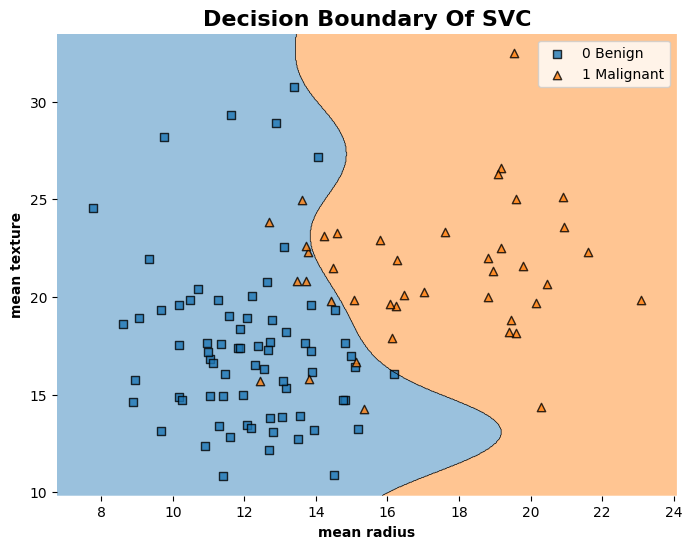

In [72]:
# now visualization

from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plot_decision_regions(
    X = x_test.to_numpy(),
    y = y_test,
    clf = svm_clf,
)
plt.legend(["0 Benign", "1 Malignant"])
plt.xlabel("mean radius",fontweight = 'bold')
plt.ylabel('mean texture',fontweight = 'bold')
plt.title("Decision Boundary Of SVC",fontweight = 'bold', fontsize = 16)

plt.show()
